In [84]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


# Retrieving data
data = pd.read_csv('mcdonalds.csv')

In [85]:
data.head

<bound method NDFrame.head of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gende

In [86]:
# label_encoder object knows 
# how to understand word labels.
label_encoder = LabelEncoder()

In [87]:
data['yummy']= label_encoder.fit_transform(data['yummy'])
data['convenient']= label_encoder.fit_transform(data['convenient'])
data['spicy']= label_encoder.fit_transform(data['spicy'])
data['fattening']= label_encoder.fit_transform(data['fattening'])
data['greasy']= label_encoder.fit_transform(data['greasy'])
data['fast']= label_encoder.fit_transform(data['fast'])
data['cheap']= label_encoder.fit_transform(data['cheap'])
data['tasty']= label_encoder.fit_transform(data['expensive'])
data['expensive']= label_encoder.fit_transform(data['expensive'])
data['healthy']= label_encoder.fit_transform(data['healthy'])
data['disgusting']= label_encoder.fit_transform(data['disgusting'])
data['VisitFrequency']= label_encoder.fit_transform(data['VisitFrequency'])
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Like']= label_encoder.fit_transform(data['Like'])

In [88]:
data.head

<bound method NDFrame.head of       yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      1   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      0   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      1   
1449      1           1      0          1       0     0      1      0   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      0   
1452      0           1      0          1       1     0      0      1   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  
0             1    

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int32
 1   convenient      1453 non-null   int32
 2   spicy           1453 non-null   int32
 3   fattening       1453 non-null   int32
 4   greasy          1453 non-null   int32
 5   fast            1453 non-null   int32
 6   cheap           1453 non-null   int32
 7   tasty           1453 non-null   int32
 8   expensive       1453 non-null   int32
 9   healthy         1453 non-null   int32
 10  disgusting      1453 non-null   int32
 11  Like            1453 non-null   int32
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int32
 14  Gender          1453 non-null   int32
dtypes: int32(14), int64(1)
memory usage: 90.9 KB


In [90]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


Implement Clustering Algorithms


K-Means Clustering Algorithm

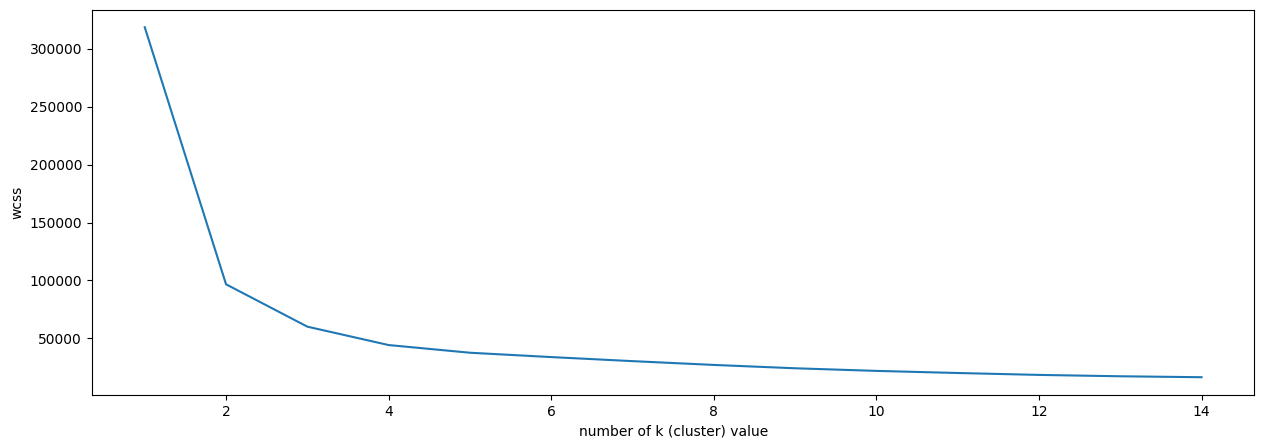

In [91]:
#define k value
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

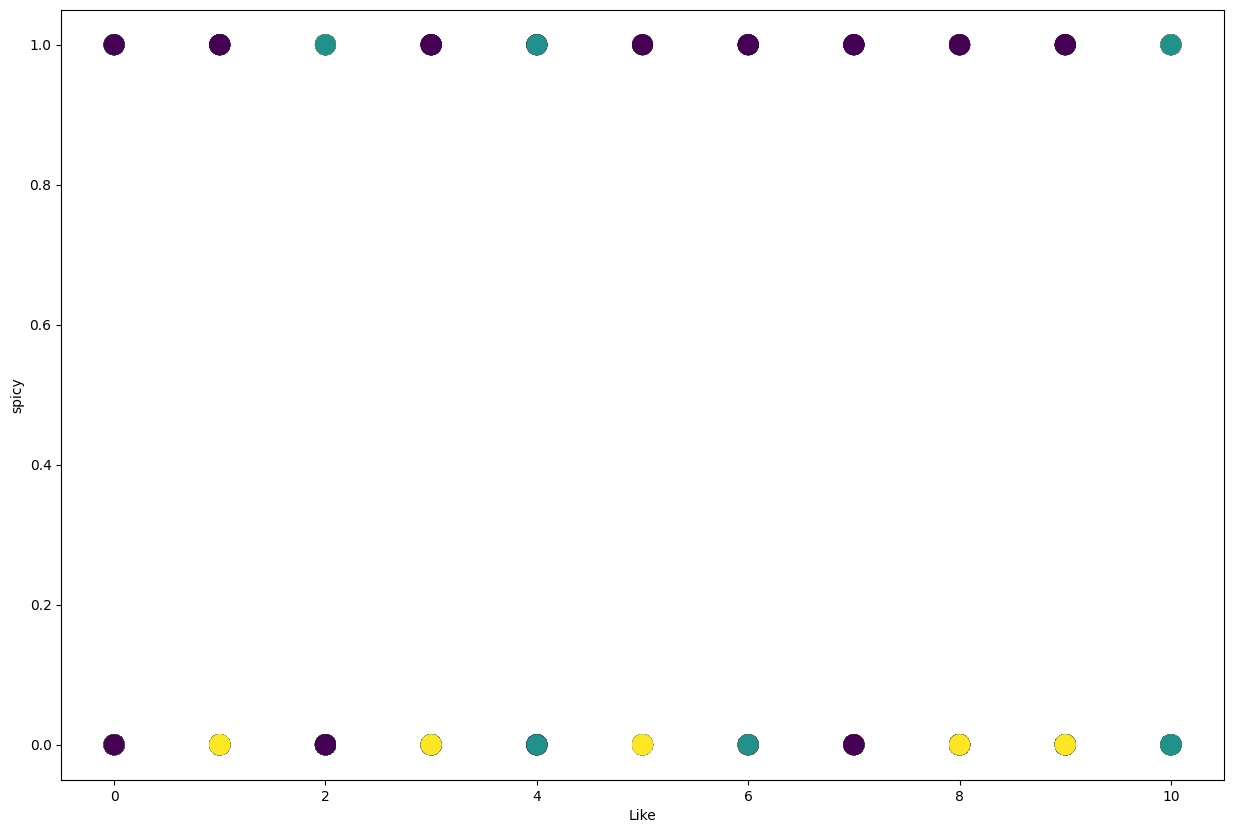

In [100]:
#create model
kmeans = KMeans(n_clusters=3)
data_predict = kmeans.fit_predict(data)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Like' ,y = 'spicy' , data = data , c = data_predict , s = 200 )
plt.xlabel("Like")
plt.ylabel("spicy")
plt.show()

Hierarchical Clustering Algorithm

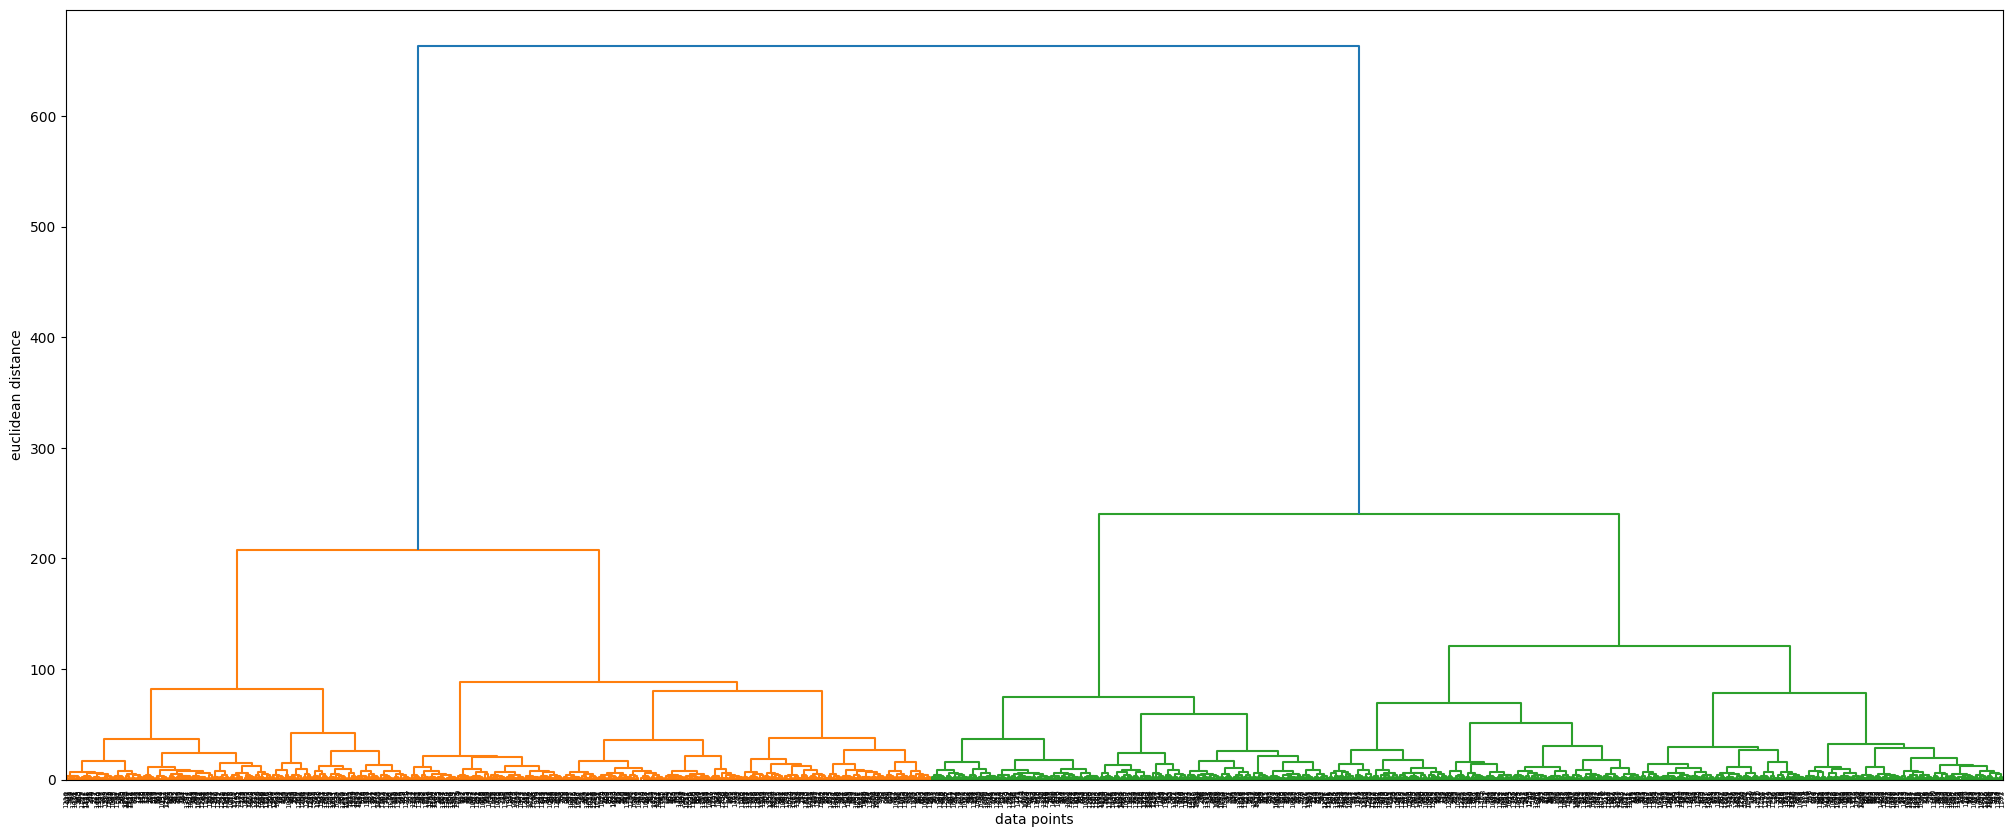

In [98]:
#create demogram and find the best clustering value
merg = linkage(data,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

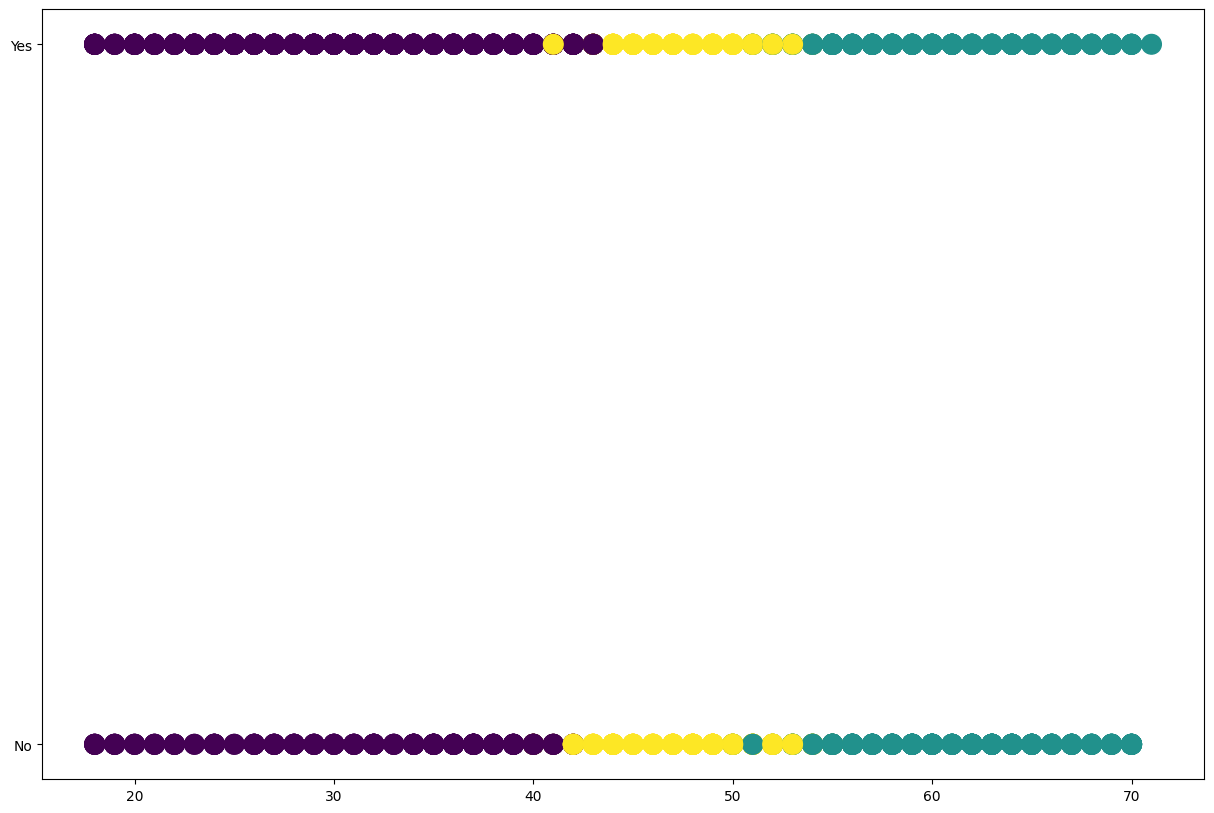

In [101]:
#create model
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(data)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Age' ,y = 'yummy' , data = data_model , c = data_predict , s = 200 )
plt.show()